In [1]:
import functions as fxn
import numpy as np
import pandas as pd
import pandas_profiling
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#from matplotlib import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

#### INSTNM 
Instituition name



#### HIGHDEG
Highest degree that students most consistently earn



#### CONTROL
Doesn't explicitly say this, but assumed

| label | description |
| --- | --- |
| 1 | public |
| 2 | private, non-profit |
| 3 | private, for-profit |



#### REGION
Region school is located



#### LOCALE
Distinguishes between city, town, rural areas, etc



#### CURROPER
Whether or not the school is currently operating



#### TUITFTE
Tuition revenue minus discounts and allowances. Divides this by the number of full-time enrolled (FTE) undergrad + grad students



#### INEXPFTE
Instructional expenditures divided by the number of FTE students



#### CDR3
This is the three-year cohort default rate. The rate at which a cohort defaults on loans 3 years after graduating.
Cohort default rates are produced annually32 as an institutional accountability metric; institutions with high default rates may lose access to federal financial aid. 



#### LO_INC_DEBT_N
The number of students in the median debt with low income (<= 30k)
How much the students took out in order to go to school.



#### MD_INC_DEBT_N
(30k< income <= 75k)



#### HI_INC_DEBT_N
(> 75k)



#### ICLEVEL
Highest degree offered by institution (not the highest one commonly earned like HIGHDEG is).



#### year
The year


## Read in the data

In [ ]:
df = pd.read_pickle('pickle_copy.pkl')

## (Back) Fill ```Locale```

## (Back) Fill ```CURROPER```

## Drop ```NaN```s

In [16]:
df.dropna(subset=['CDR3', 'CONTROL'], inplace=True)

# drop PrivacySuppressed values as well
df = df.replace('PrivacySuppressed', np.NaN)
df.dropna(subset=['LO_INC_DEBT_N', 'MD_INC_DEBT_N', 'HI_INC_DEBT_N'], inplace=True)
df['Public_or_Private'] = df.CONTROL.map({2:0, 1:1, 3:1})

## Ideas

1. Make control binary (private for profit or not), and run logistic regression against CDR3
2. Run logistic regression on locale vs control=1 or control = 3
3. We can model number of students in debt by log of their income (and total student population)

### 1. Make control binary (private for profit or not), and run logistic regression against CDR3

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33097 entries, 0 to 7169
Data columns (total 15 columns):
INSTNM               33097 non-null object
HIGHDEG              33097 non-null int64
CONTROL              33097 non-null float64
REGION               33096 non-null float64
LOCALE               0 non-null float64
CURROPER             0 non-null float64
TUITFTE              30904 non-null float64
INEXPFTE             30905 non-null float64
CDR3                 33097 non-null float64
LO_INC_DEBT_N        33097 non-null object
MD_INC_DEBT_N        33097 non-null object
HI_INC_DEBT_N        33097 non-null object
ICLEVEL              33097 non-null float64
year                 33097 non-null int64
Public_or_Private    33097 non-null int64
dtypes: float64(8), int64(3), object(4)
memory usage: 4.0+ MB


In [4]:
df = pd.read_pickle('pickle_copy.pkl')
df.dropna(subset=['CDR3', 'CONTROL'], inplace=True)
df = df.replace('PrivacySuppressed', np.NaN)
df.dropna(subset=['LO_INC_DEBT_N', 'MD_INC_DEBT_N', 'HI_INC_DEBT_N'], inplace=True)
df['Public_or_Private'] = df.CONTROL.map({2:0, 1:1, 3:1})

In [5]:
fxn.create_logistic_regression(df, ['CDR3', 'HI_INC_DEBT_N'], 'Public_or_Private'
                              ).score(df[['CDR3', 'HI_INC_DEBT_N']], df['Public_or_Private'])

0.7426352841647279

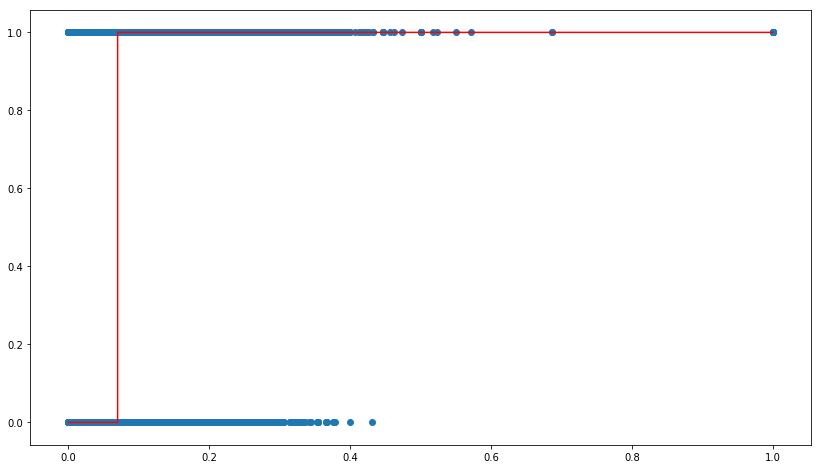

In [12]:
# plt.scatter(x='TUITFTE', y='CURROPER', data=df_known_curroper)
# plt.xlim(0, 100_000)
plt.figure(figsize=(14,8))
plt.scatter('CDR3', 'Public_or_Private', data=df)
plt.plot(df.CDR3.sort_values(), df.Public_or_Private.sort_values(), c='r')
plt.show()

We would also like to backfill data like ```CURROPER```, ```LOCALE```, and ```REGION```.

In [26]:
df_play.loc[df_play.INSTNM == 'Harvard University']

,INSTNM,HIGHDEG,CONTROL,REGION,LOCALE,CURROPER,TUITFTE,INEXPFTE,CDR3,LO_INC_DEBT_N,MD_INC_DEBT_N,HI_INC_DEBT_N,ICLEVEL,year
2194,Harvard University,4,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1996
2088,Harvard University,4,NaN,1.0,NaN,NaN,NaN,NaN,NaN,864,PrivacySuppressed,PrivacySuppressed,1.0,1997
2029,Harvard University,4,NaN,1.0,NaN,NaN,68001.0,79912.0,NaN,867,47,39,1.0,1998
2010,Harvard University,4,NaN,1.0,NaN,NaN,72033.0,87134.0,NaN,660,115,85,1.0,1999
1968,Harvard University,4,NaN,1.0,NaN,NaN,150024.0,191265.0,NaN,650,260,192,1.0,2000
1977,Harvard University,4,NaN,1.0,NaN,NaN,155111.0,201515.0,NaN,612,392,419,1.0,2001
1957,Harvard University,4,NaN,1.0,NaN,NaN,25650.0,38020.0,NaN,406,394,557,1.0,2002
1938,Harvard University,4,NaN,1.0,NaN,NaN,23511.0,37151.0,NaN,373,314,513,1.0,2003
1898,Harvard University,4,NaN,1.0,NaN,NaN,25653.0,40563.0,NaN,297,217,404,1.0,2004
1886,Harvard University,4,NaN,1.0,NaN,NaN,28684.0,45658.0,NaN,251,151,360,1.0,2005


In [27]:
institutions = df_play[['INSTNM', 'LOCALE', 'REGION']].groupby(['INSTNM'])
institutions.get_group('Harvard University').fillna(method='bfill')

,INSTNM,LOCALE,REGION
2194,Harvard University,12.0,1.0
2088,Harvard University,12.0,1.0
2029,Harvard University,12.0,1.0
2010,Harvard University,12.0,1.0
1968,Harvard University,12.0,1.0
1977,Harvard University,12.0,1.0
1957,Harvard University,12.0,1.0
1938,Harvard University,12.0,1.0
1898,Harvard University,12.0,1.0
1886,Harvard University,12.0,1.0


In [ ]:
palette = {1:'r', 2:'white', 3:'blue'}
sns.scatterplot(x='LOCALE', y='CDR3', data=df, hue='CONTROL', palette=palette)

plt.show()

## Let's investigate the debt aspects.

In [141]:
df[['INSTNM', 'LO_INC_DEBT_N', 'MD_INC_DEBT_N', 'HI_INC_DEBT_N']].dropna().head(20)

,INSTNM,LO_INC_DEBT_N,MD_INC_DEBT_N,HI_INC_DEBT_N
1,Alabama A & M University,690,54,13
2,University of Alabama at Birmingham,2909,416,95
3,ALABAMA AVIATION AND TECHNICAL COLLEGE,70,PrivacySuppressed,PrivacySuppressed
4,Amridge University,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
5,University of Alabama in Huntsville,1088,164,37
6,Alabama State University,2672,230,45
7,The University of Alabama,3513,461,205
8,Central Alabama Community College,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
9,Athens State University,628,100,11
10,Auburn University at Montgomery,1272,199,44


In [151]:
temp = df.replace('PrivacySuppressed', np.NaN)

In [152]:
df_no_privacy = temp[['INSTNM', 'LO_INC_DEBT_N', 'MD_INC_DEBT_N', 'HI_INC_DEBT_N']].dropna()

In [153]:
df_no_privacy.shape

(89285, 4)

### Create a new feature 

Create a feature called ```TUTION_VALUE``` which is how much a school spend on student per dollar a student pays in tuition.

In [22]:
df['TUITION_VALUE'] = df.INEXPFTE/df.TUITFTE

(133053, 15)

In [29]:
df.TUITFTE.quantile(0.98)

32980.13999999972

In [30]:
df.TUITFTE.quantile(0.02)

292.5799999999999

## Create a clean dataframe with no null values

In [48]:
df_known_curroper = df.loc[df.year==2017].dropna(subset=['CURROPER'])

In [49]:
df_known_curroper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7058 entries, 0 to 7057
Data columns (total 15 columns):
INSTNM           7058 non-null object
HIGHDEG          7058 non-null int64
CONTROL          7058 non-null float64
REGION           7058 non-null float64
LOCALE           6614 non-null float64
CURROPER         7058 non-null float64
TUITFTE          6593 non-null float64
INEXPFTE         6593 non-null float64
CDR3             6055 non-null float64
LO_INC_DEBT_N    0 non-null object
MD_INC_DEBT_N    0 non-null object
HI_INC_DEBT_N    0 non-null object
ICLEVEL          7058 non-null float64
year             7058 non-null int64
TUITION_VALUE    6589 non-null float64
dtypes: float64(9), int64(2), object(4)
memory usage: 882.2+ KB


In [50]:
df_known_curroper.drop(columns=['LO_INC_DEBT_N', 'MD_INC_DEBT_N', 'HI_INC_DEBT_N'], inplace=True)

In [51]:
df_known_curroper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7058 entries, 0 to 7057
Data columns (total 12 columns):
INSTNM           7058 non-null object
HIGHDEG          7058 non-null int64
CONTROL          7058 non-null float64
REGION           7058 non-null float64
LOCALE           6614 non-null float64
CURROPER         7058 non-null float64
TUITFTE          6593 non-null float64
INEXPFTE         6593 non-null float64
CDR3             6055 non-null float64
ICLEVEL          7058 non-null float64
year             7058 non-null int64
TUITION_VALUE    6589 non-null float64
dtypes: float64(9), int64(2), object(1)
memory usage: 716.8+ KB


In [52]:
df_known_curroper.dropna(inplace=True)

In [53]:
df_known_curroper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5620 entries, 0 to 6612
Data columns (total 12 columns):
INSTNM           5620 non-null object
HIGHDEG          5620 non-null int64
CONTROL          5620 non-null float64
REGION           5620 non-null float64
LOCALE           5620 non-null float64
CURROPER         5620 non-null float64
TUITFTE          5620 non-null float64
INEXPFTE         5620 non-null float64
CDR3             5620 non-null float64
ICLEVEL          5620 non-null float64
year             5620 non-null int64
TUITION_VALUE    5620 non-null float64
dtypes: float64(9), int64(2), object(1)
memory usage: 570.8+ KB


In [55]:
df_known_curroper.CURROPER.value_counts()

1.0    5289
0.0     331
Name: CURROPER, dtype: int64

## Partition dataframe into predictor values and the ```CURROPER```

In [60]:
X = df_known_curroper.drop(['INSTNM', 'CURROPER', 'year', 'TUITION_VALUE'], axis=1)
y = df_known_curroper['CURROPER']

In [61]:
scaler = MinMaxScaler()
scaler.fit(X)
scaler.transform(X)

C:\Users\cliff\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[1.        , 0.        , 0.55555556, ..., 0.01468801, 0.34375   ,
        0.        ],
       [1.        , 0.        , 0.55555556, ..., 0.03468728, 0.10243056,
        0.        ],
       [1.        , 0.5       , 0.55555556, ..., 0.01059638, 0.22222222,
        0.        ],
       ...,
       [0.75      , 0.        , 0.33333333, ..., 0.01068091, 0.12152778,
        0.        ],
       [0.25      , 0.        , 0.33333333, ..., 0.11331782, 0.16840278,
        0.        ],
       [0.5       , 0.        , 0.33333333, ..., 0.0051885 , 0.19965278,
        0.5       ]])

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [65]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='lbfgs')
model_log = logreg.fit(X_train, y_train)

In [66]:
df_known_curroper['PREDICTED_FAILURE'] = logreg.predict(X)

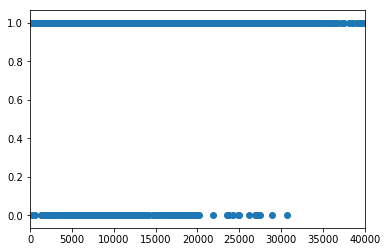

In [74]:
plt.scatter(x='TUITFTE', y='CURROPER', data=df_known_curroper)
plt.xlim(0, 100_000)
# plt.plot(x='TUITFTE', y='PREDICTED_FAILURE', data=df_known_curroper)
# plt.plot(df_known_curroper['TUITFTE'], df_known_curroper['PREDICTED_FAILURE'])
plt.show()

# Try Again!

This time partitioning into Bachelors and higher, vs others

In [100]:
df_known_curroper['small_town'] = df_known_curroper.LOCALE.map(lambda x: int(x>6457))

In [106]:
df_known_curroper['high_tuition'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5620 entries, 0 to 6612
Data columns (total 15 columns):
INSTNM               5620 non-null object
HIGHDEG              5620 non-null int64
CONTROL              5620 non-null float64
REGION               5620 non-null float64
LOCALE               5620 non-null float64
CURROPER             5620 non-null float64
TUITFTE              5620 non-null float64
INEXPFTE             5620 non-null float64
CDR3                 5620 non-null float64
ICLEVEL              5620 non-null float64
year                 5620 non-null int64
TUITION_VALUE        5620 non-null float64
PREDICTED_FAILURE    5620 non-null float64
Institution_type     5620 non-null int64
high_tuition         5620 non-null int64
dtypes: float64(10), int64(4), object(1)
memory usage: 862.5+ KB


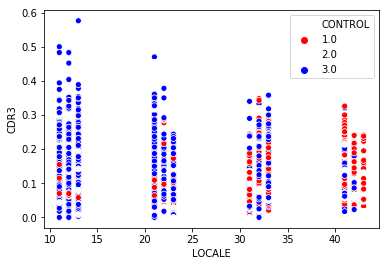

In [135]:
palette = {1:'r', 2:'white', 3:'blue'}
sns.scatterplot(x='LOCALE', y='CDR3', data=df, hue='CONTROL', palette=palette)

# plt.scatter(df_known_curroper['LOCALE'], df_known_curroper['CDR3'])
# plt.xlim(0, 20_000)
# plt.ylim(0, 1)
plt.show()

C:\Users\cliff\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\cliff\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


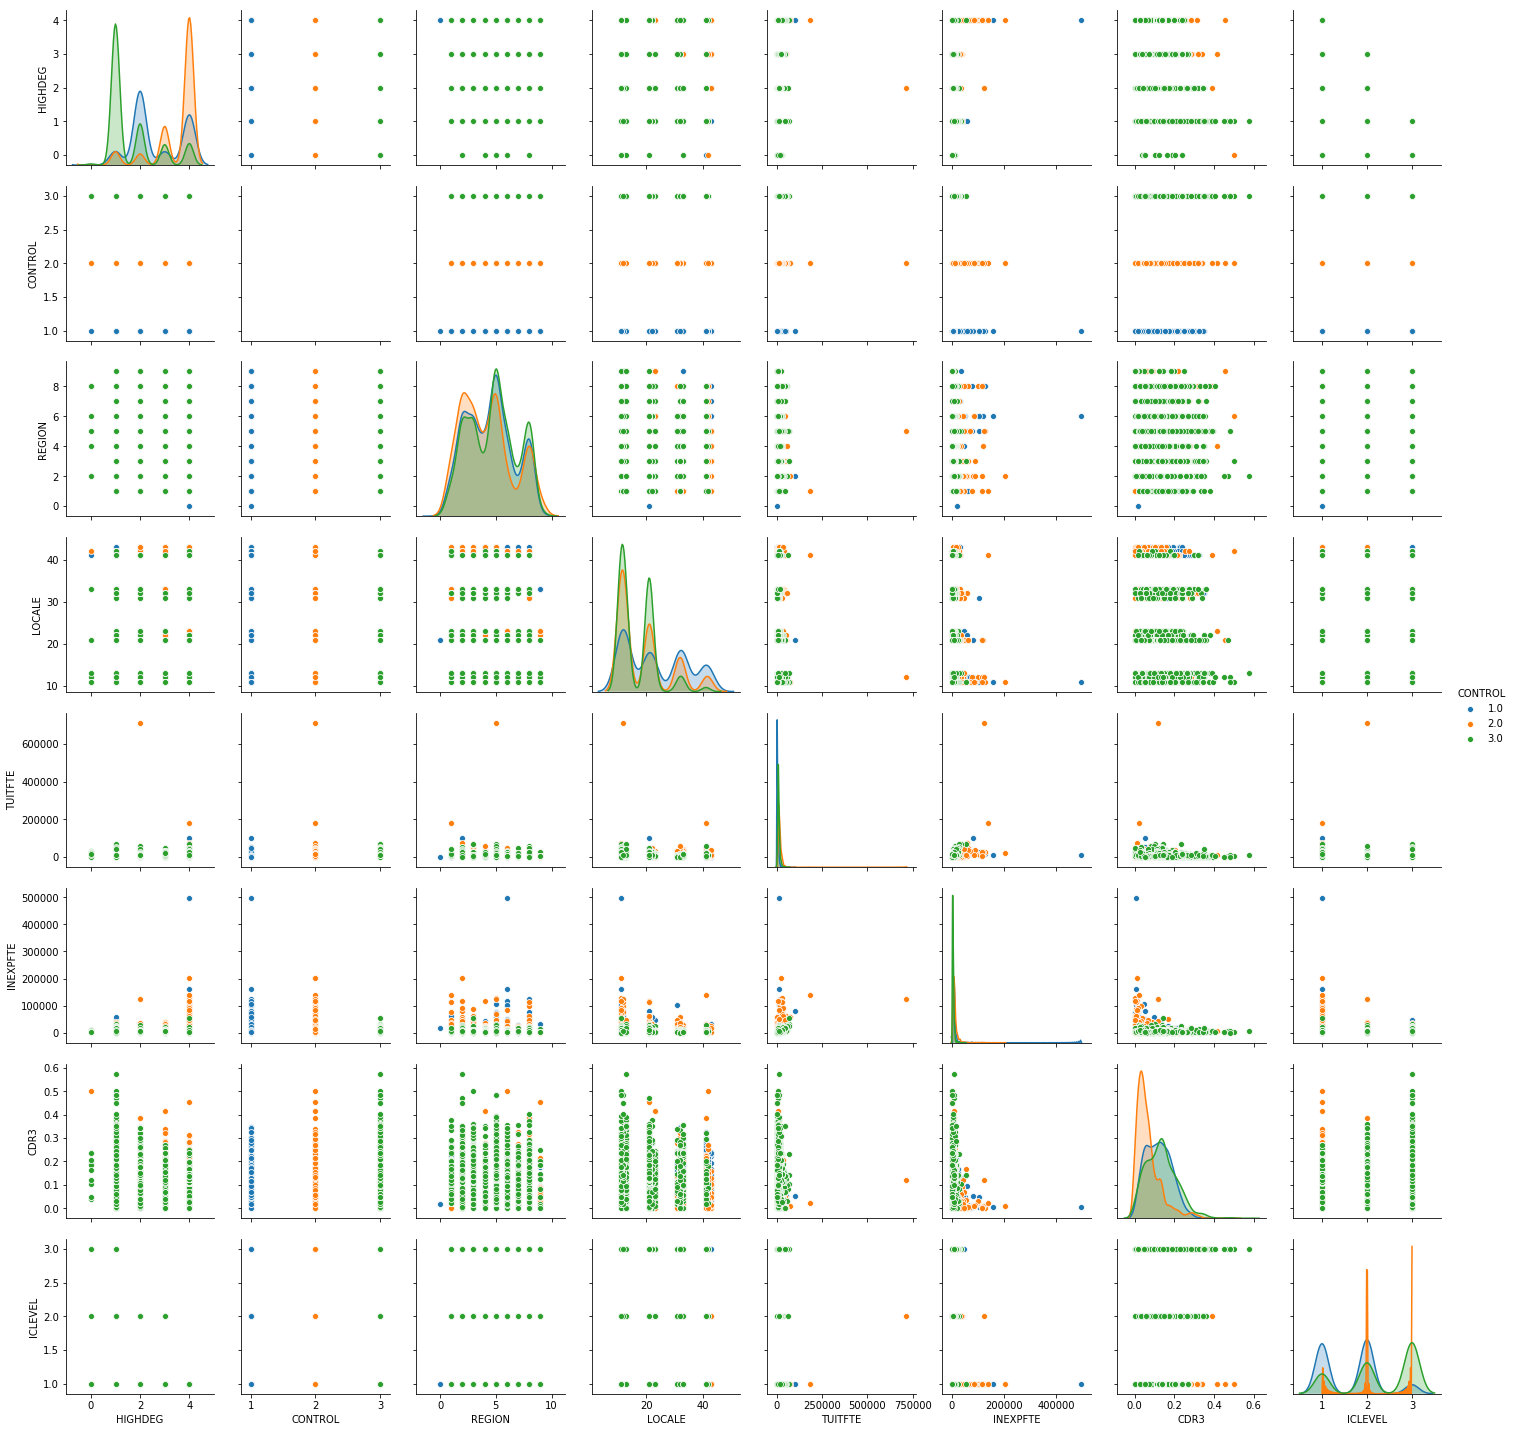

In [123]:
sns.pairplot(X, hue='CONTROL')

## Ideas

- make control binary (private for profit or not), and run logistic regression against CDR3
- run logistic regression on locale vs control=1 or control = 3
- We can model number of students in debt by log of their income (and total student population)

In [136]:
sns.pairplot(df.drop(columns=['INSTNM', ], hue='CONTROL')
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154228 entries, 0 to 7057
Data columns (total 15 columns):
INSTNM           154228 non-null object
HIGHDEG          154228 non-null int64
CONTROL          154205 non-null float64
REGION           154227 non-null float64
LOCALE           6614 non-null float64
CURROPER         7058 non-null float64
TUITFTE          133780 non-null float64
INEXPFTE         133775 non-null float64
CDR3             47815 non-null float64
LO_INC_DEBT_N    137486 non-null object
MD_INC_DEBT_N    137486 non-null object
HI_INC_DEBT_N    137486 non-null object
ICLEVEL          154205 non-null float64
year             154228 non-null int64
TUITION_VALUE    133528 non-null float64
dtypes: float64(9), int64(2), object(4)
memory usage: 23.8+ MB
